In [ ]:
!pip install cma
!pip install torch
!pip install botorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.7/269.7 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import KDTree
import itertools as it
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import torch
import math
from botorch.fit import fit_gpytorch_mll
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.models.transforms import Standardize
from botorch.acquisition.acquisition import AcquisitionFunction
from botorch.acquisition import UpperConfidenceBound
import cma

In [ ]:
# Mount Drive
# Get initial Values
inputs = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_7/initial_inputs.npy')
outputs = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_7/initial_outputs.npy')

In [ ]:
print(inputs)

[[0.27262382 0.32449536 0.89710881 0.83295115 0.15406269 0.79586362]
 [0.54300258 0.9246939  0.34156746 0.64648585 0.71844033 0.34313266]
 [0.09083225 0.66152938 0.06593091 0.25857701 0.96345285 0.6402654 ]
 [0.11886697 0.61505494 0.90581639 0.8553003  0.41363143 0.58523563]
 [0.63021764 0.8380969  0.68001305 0.73189509 0.52673671 0.34842921]
 [0.76491917 0.25588292 0.60908422 0.21807904 0.32294277 0.09579366]
 [0.05789554 0.49167222 0.24742222 0.21811844 0.42042833 0.73096984]
 [0.19525188 0.07922665 0.55458046 0.17056682 0.01494418 0.10703171]
 [0.64230298 0.83687455 0.02179269 0.10148801 0.68307083 0.6924164 ]
 [0.78994255 0.19554501 0.57562333 0.07365919 0.25904917 0.05109986]
 [0.52849733 0.45742436 0.36009569 0.36204551 0.81689098 0.63747637]
 [0.72261522 0.01181284 0.06364591 0.16517311 0.07924415 0.35995166]
 [0.07566492 0.33450212 0.13273274 0.60831236 0.91838592 0.82233079]
 [0.94245084 0.37743962 0.48612233 0.22879108 0.08263175 0.71195755]
 [0.14864702 0.03394336 0.72880565

In [ ]:
#Add new Inputs and Outputs
new_inputs = np.array([[0.565109, 0.919048, 0.840007, 0.365948, 0.513368, 0.424215],[0.271501, 0.687347 ,0.445784, 0.573243, 0.73422,  0.171566],[0.507554, 0.709524 ,0.920003, 0.182974 ,0.506684 ,0.712107],[0.782554, 0.959524, 0.670003, 0.432974, 0.481684, 0.712107],[0.532122, 0.627393, 0.538614, 0.549902, 0.604653, 0.680134],[0.530456, 0.583909, 0.508251, 0.562939, 0.603956, 0.68181]])
new_outputs = np.array([0.21511504250318814, 1.3219168651763396, 0.24438551897404212, 0.052036579112222335, 0.14792223637044258, 0.15851281630423428])


In [ ]:
inputs = np.append(inputs, new_inputs, axis = 0)
outputs = np.append(outputs, new_outputs)
print(outputs)

[0.6044327  0.56275307 0.00750324 0.0614243  0.2730468  0.08374657
 1.3649683  0.09264495 0.0178696  0.03356494 0.0735163  0.2063097
 0.00882563 0.26840032 0.61152553 0.01479818 0.27489251 0.06676325
 0.04211835 0.00270147 0.01820907 0.00701603 0.10050661 0.47539552
 0.67514163 0.51645722 0.00377748 0.00313433 0.02134252 0.09541116
 0.21511504 1.32191687 0.24438552 0.05203658 0.14792224 0.15851282]


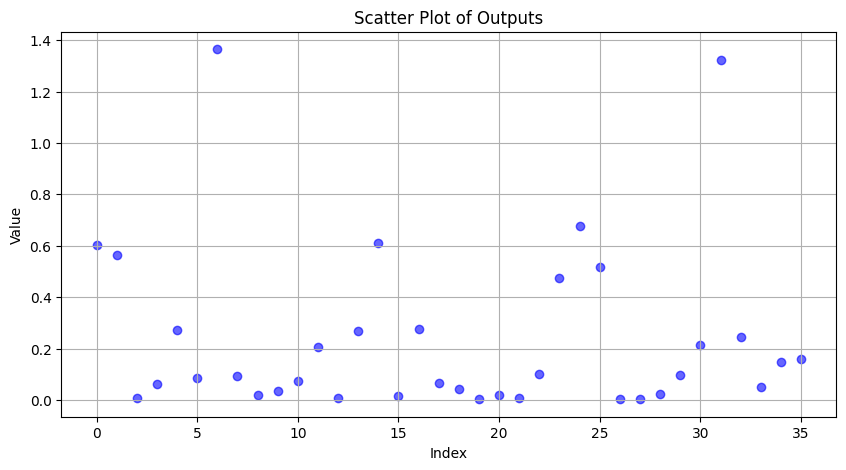

In [ ]:
#Visualise New Outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot

In [ ]:
# Example data (replace with your actual inputs and outputs)
N = 6  # Number of dimensions


# Standardize the initial training data to zero mean and unit variance
def standardize(X):
    mean = X.mean(0)
    std = X.std(0)
    return (X - mean) / std, mean, std

def unstandardize(X, mean, std):
    return X * std + mean

X_standardized, mean_X, std_X = standardize(inputs)


# Convert to torch tensors
train_X = torch.tensor(X_standardized, dtype=torch.double)
train_Y = torch.tensor(outputs, dtype=torch.double).unsqueeze(-1)


# Define the model
model = SingleTaskGP(train_X, train_Y)
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_mll(mll)

# Define the acquisition function
acq_func = UpperConfidenceBound(model, beta=1.0)

# Define the objective for CMA-ES
def objective(x):
    x = torch.tensor(x, dtype=torch.double).unsqueeze(0)
    x_standardized = (x - mean_X) / std_X  # Standardize the input
    with torch.no_grad():
        acq_value = acq_func(x_standardized)
    return -acq_value.item()  # Negate because CMA-ES minimizes

# Initialize CMA-ES
es = cma.CMAEvolutionStrategy(train_X.mean(0).numpy(), 0.2, {'popsize': 20})

# Optimization loop
max_iter = 50  # Limit the number of iterations to avoid long runs
for _ in range(max_iter):
    solutions = es.ask()
    values = [objective(x) for x in solutions]
    es.tell(solutions, values)

# Best solution
best_solution = es.result.xbest
best_solution = torch.tensor(best_solution, dtype=torch.double).unsqueeze(0)
best_solution = unstandardize(best_solution, mean_X, std_X)

# Print best solution with 6 decimal places
best_solution_rounded = best_solution.numpy().round(6)

print(f"Best solution: {best_solution_rounded}")


/usr/local/lib/python3.10/dist-packages/botorch/models/utils/assorted.py:174: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/usr/local/lib/python3.10/dist-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([0.2424], dtype=torch.float64), std = tensor([0.3369], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 6 (seed=219693, Tue Jun 11 20:13:16 2024)
Best solution: [[0.556847 0.465424 0.669626 0.586796 0.483896 0.6404  ]]


## Change Log
#### 16th May <br>
13/35 - using pseudo random distance generator
#### 19th May <br>
15/37 - using pseudo random distance generator
#### 11th June <br>
First switch to
Realise I have probably got the wrong settings at the outset and decide to get a bit more exploratory for a couple of weeks.  <br>
<ul>Position 19/40<br>
Change Beta from 0.1 to 1 <br>
Keep Pop Size 20 <br>
Set Sigma to 0.2 , from default of probably around 0.1</ul>


### 15th June START FROM HERE
Turns out what I was doing with TURBO was wrong.  I was failing to set the local area to be optimised or tracking state of the function.  Now trying again following the tutorial.
### Defines a data class to store the the state

In [ ]:
from dataclasses import dataclass
import numpy as np
import torch
import math
from botorch.generation import MaxPosteriorSampling
from torch.quasirandom import SobolEngine
import botorch
import gpytorch
import matplotlib.pyplot as plt


In [ ]:
# we define a dataclass for our state this is used to store the state of the area
@dataclass
class TurboState:
    dim: int # dimension of the problem, aka input dimension
    batch_size: int = 1 # we could do batch optimization, but the capstone only does one query at a time
    length: float = 0.4 # the length of the current trust region
    length_min: float = 0.25 ** 7 # minimum length for the trust region
    length_max: float = 0.5 # maximum length for the trust region
    failure_counter: int = 0 # initialize counter of the number of failures to improve on the best observation
    failure_tolerance: int = float("nan")  # Note: Post-initialized
    success_counter: int = 0 # initialize counter of the number of success to improve on the best observation
    success_tolerance: int = 10  # Note: The original paper uses 3, this is the number of successes in a row needed to expand the region
    best_value: float = -float("inf") # best value so far, initialized to be the infimum
    restart_triggered: bool = False

    # This method is automatically called after the dataclass is initialized. It sets the failure_tolerance attribute based on the dimension and batch size:
    def __post_init__(self):
        self.failure_tolerance = math.ceil(
            max([4.0 / self.batch_size, float(self.dim) / self.batch_size]) # number of failures needed in a row to shrink the trust region
        )

# this updates the state depending on Y_next
def update_state(state, Y_next):

    # count if a success, otherwise a failure
    if max(Y_next) > state.best_value + 1e-3 * math.fabs(state.best_value):
        state.success_counter += 1
        state.failure_counter = 0
    else:
        state.success_counter = 0
        state.failure_counter += 1
    # check if we need to expand or shrink the trust region
    if state.success_counter == state.success_tolerance:  # Expand trust region
        state.length = min(2.0 * state.length, state.length_max)
        state.success_counter = 0
    elif state.failure_counter == state.failure_tolerance:  # Shrink trust region
        state.length /= 2.0
        state.failure_counter = 0
    # set the best value if we got a new observation
    state.best_value = max(state.best_value, max(Y_next))
    if state.length < state.length_min:
        state.restart_triggered = True
    return state


In [ ]:
def create_initial_state(dim, batch_size=1, length=0.4, length_min=0.25**7, length_max=0.5, failure_counter = 0, success_counter=0, success_tolerance=10, best_value = 1, restart_triggered = False):
    return TurboState(
        dim=dim,
        batch_size=batch_size,
        length=length,
        length_min=length_min,
        length_max=length_max,
        failure_counter=0,
        success_counter=0,
        success_tolerance=success_tolerance,
        best_value=-float("inf"),
        restart_triggered=False
    )



In [ ]:
state = TurboState(dim = 6)

In [ ]:
def generate_batch(
    state,
    model,  # GP model
    X,  # Evaluated points on the domain [0, 1]^d
    Y,  # Function values
    batch_size = 1, # fix batch size to 1
    n_candidates=None,  # Number of candidates for Thompson sampling
    num_restarts=10,
    raw_samples=512,
    acqf="ts",  # "ei" or "ts"
):
    assert acqf in ("ts")
    assert X.min() >= 0.0 and X.max() <= 1.0 and torch.all(torch.isfinite(Y))
    if n_candidates is None:
        n_candidates = min(5000, max(2000, 200 * X.shape[-1]))

    # Scale the trust region to be proportional to the lengthscales
    x_center = X[Y.argmax(), :].clone()
    weights = model.covar_module.base_kernel.lengthscale.squeeze().detach()
    weights = weights / weights.mean()
    weights = weights / torch.prod(weights.pow(1.0 / len(weights)))
    tr_lb = torch.clamp(x_center - weights * state.length / 2.0, 0.0, 1.0)
    tr_ub = torch.clamp(x_center + weights * state.length / 2.0, 0.0, 1.0)
    # we focus only on thompson sampling as an acquisition function
    if acqf == "ts":
        dim = X.shape[-1]
        sobol = SobolEngine(dim, scramble=True)
        pert = sobol.draw(n_candidates)
        pert = tr_lb + (tr_ub - tr_lb) * pert

        # Create a perturbation mask
        prob_perturb = min(10.0 / dim, 1.0)
        mask = (
            torch.rand(n_candidates, dim)
            <= prob_perturb
        )
        ind = torch.where(mask.sum(dim=1) == 0)[0]
        mask[ind, torch.randint(0, dim - 1, size=(len(ind),))] = 1

        # Create candidate points from the perturbations and the mask
        X_cand = x_center.expand(n_candidates, dim).clone()
        X_cand[mask] = pert[mask]

        # Sample on the candidate points
        # set model to evaluation mode
        model.eval()
        posterior_distribution = model(X_cand)
        with torch.no_grad():  # We don't need gradients when using TS
            posterior_sample = posterior_distribution.sample()
            X_next_idx = torch.argmax(posterior_sample)
            X_next = X_cand[X_next_idx]

    return X_next

In [ ]:
# we use the model given in the tutorial, we also add the hyper-parameter training as a method
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        # set a constant mean
        self.mean_module = gpytorch.means.ConstantMean()
        # use a simple RBF kernel with constant scaling
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=train_x.shape[1]))
        # set number of hyper-parameter training iterations
        self.training_iter = 200

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [ ]:
#Step 1 Re-initialise the State UPDATE PARAMETERS HERE
state = TurboState(
    dim=6,
    batch_size=1,
    length=0.3,
    length_max=0.5,
    success_tolerance=3,
    failure_counter=0,
    success_counter=1,
    best_value= 2.209114785654296
)

#Step 2 Update the State with the new function PLACE NEw VALUE HERE
y_next = [1.44926461407947]
new_state = update_state(state, y_next)

print(state)
#Step 3 NOW append the new values!!!


TurboState(dim=6, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=1, failure_tolerance=6, success_counter=0, success_tolerance=3, best_value=2.209114785654296, restart_triggered=False)


In [ ]:
# Mount Drive
# Get initial Values
inputs1 = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_7/initial_inputs.npy')
outputs1 = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_7/initial_outputs.npy')
inputs2 = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_7/initial_inputs2.npy')
outputs2 = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_7/initial_outputs2.npy')

# Concatenate inputs and outputs
inputs = np.concatenate((inputs1, inputs2), axis=0)
outputs = np.concatenate((outputs1, outputs2), axis=0)

#Import check
print(len(inputs1),len(inputs2),len(inputs))
print(len(outputs1),len(outputs2),len(outputs))


30 30 60
30 30 60


In [ ]:
#Add new Inputs and Outputs
new_inputs = np.array([
    [0.565109, 0.919048, 0.840007, 0.365948, 0.513368, 0.424215],
    [0.271501, 0.687347 ,0.445784, 0.573243, 0.73422,  0.171566],
    [0.507554, 0.709524 ,0.920003, 0.182974 ,0.506684 ,0.712107],
    [0.782554, 0.959524, 0.670003, 0.432974, 0.481684, 0.712107],
    [0.532122, 0.627393, 0.538614, 0.549902, 0.604653, 0.680134],
    [0.530456, 0.583909, 0.508251, 0.562939, 0.603956, 0.68181],
    [0.017334, 0.320507, 0.381593, 0.045408,0.22625,0.889867],
    [0.191193, 0.625201, 0.065572, 0.086578, 0.228782, 0.83004 ],
    [0.077878, 0.591531, 0.238391 ,0.077184, 0.272213 ,0.661918],
    [0.086823,0.105957, 0.254616, 0.093899, 0.21766,0.712764],
    [0.293978, 0.353793, 0.278003, 0.084784, 0.350901, 0.715206],
    [0.307892, 0.104694, 0.278263, 0.367378, 0.383905, 0.794982],
    [0.242229, 0.008556, 0.160186, 0.229956, 0.267239 ,0.92705 ]])
new_outputs = np.array([0.21511504250318814,
                        1.3219168651763396,
                        0.24438551897404212,
                        0.052036579112222335,
                        0.14792223637044258,
                        0.15851281630423428,
                        0.9304924849464572,
                        0.5648606885183377,
                        0.9105011451045842,
                        1.7208151767194493,
                        1.6867981408587855,
                        2.209114785654296,
                        1.44926461407947])

inputs = np.append(inputs, new_inputs, axis = 0)
outputs = np.append(outputs, new_outputs , axis = 0)

print(np.max(outputs))

2.209114785654296


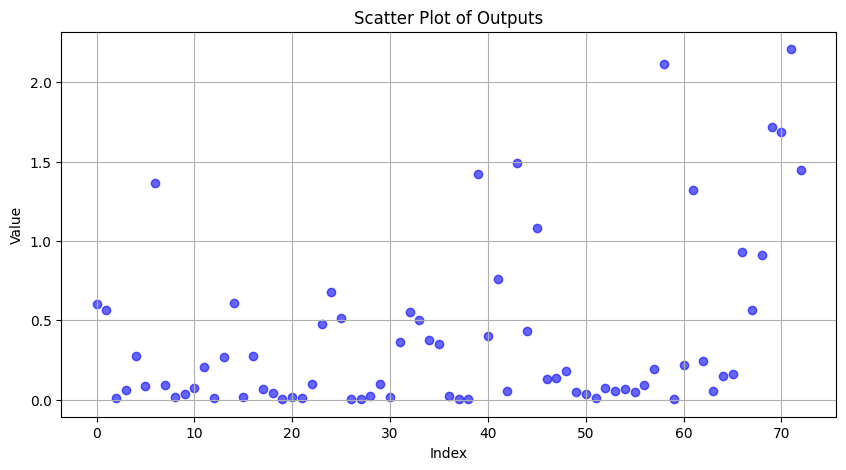

In [ ]:
#Visualise New Outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot

In [ ]:
# Convert to torch tensors
train_X = torch.from_numpy(inputs).to(torch.float32)
train_Y = torch.from_numpy(outputs).to(torch.float32)


In [ ]:
def next_query_via_TurBO(train_x, train_y, turbo_state, verbose = False):
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    model.train()
    likelihood.train()

    # Use the adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)


    for i in range(model.training_iter):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_X)
        # Calc loss and backprop gradients
        print(output)
        print(train_Y.dtype)
        break
        loss = -mll(output, train_Y)
        loss.backward()
        if i % 10 == 9:
            print(f'Iter %d/%d - Loss: %.6f   lengthscale: {model.covar_module.base_kernel.lengthscale.detach()}   noise: %.6f' % (
                i + 1, model.training_iter, loss.item(),
                model.likelihood.noise.item()
            ))
        optimizer.step()

    return generate_batch(turbo_state, model = model, X = train_x, Y = train_y)

In [ ]:
print(np.max(outputs))

2.209114785654296


In [ ]:
next_query = next_query_via_TurBO(train_x=train_X, train_y=train_Y, turbo_state=state)
formatted_query = [f'{item:.6f}' for item in next_query]
formatted_output = f'{formatted_query[0]}-{formatted_query[1]}-{formatted_query[2]}-{formatted_query[3]}-{formatted_query[4]}-{formatted_query[5]}'
print(f'Next chosen query: {formatted_output}')
print(state)

MultivariateNormal(loc: torch.Size([73]))
torch.float32


/usr/local/lib/python3.10/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(


Next chosen query: 0.197514-0.007164-0.152047-0.243319-0.366550-0.755971
TurboState(dim=6, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=1, failure_tolerance=6, success_counter=0, success_tolerance=3, best_value=2.209114785654296, restart_triggered=False)


Entry 15th June:<br>
MultivariateNormal(loc: torch.Size([36]))
torch.float32
Next chosen query: 0.017334-0.320507-0.381593-0.045408-0.226250-0.889867
TurboState(dim=6, batch_size=1, length=0.4, length_min=6.103515625e-05, length_max=0.5, failure_counter=0, failure_tolerance=6, success_counter=0, success_tolerance=10, best_value=-inf, restart_triggered=False)

Entry 20th June: This is a restart as I did not initialise it correctly<br>
ext chosen query: Next chosen query: 0.191193-0.625201-0.065572-0.086578-0.228782-0.830040
TurboState(dim=6, batch_size=1, length=0.4, length_min=6.103515625e-05, length_max=0.5, failure_counter=0, failure_tolerance=6, success_counter=0, success_tolerance=10, best_value=-inf, restart_triggered=False)


Entry 23rd June <br>
Next chosen query: 0.077878-0.591531-0.238391-0.077184-0.272213-0.661918
TurboState(dim=6, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=1, failure_tolerance=6, success_counter=0, success_tolerance=3, best_value=1.3649683044991994, restart_triggered=False)


Entry 7th July <br>
Next chosen query: 0.086823-0.105957-0.254616-0.093899-0.217660-0.712764
TurboState(dim=6, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=2, failure_tolerance=6, success_counter=0, success_tolerance=3, best_value=2.1146906674520287, restart_triggered=False)

Entry 14th July <br>
Next chosen query: 0.293978-0.353793-0.278003-0.084784-0.350901-0.715206
TurboState(dim=6, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=3, failure_tolerance=6, success_counter=0, success_tolerance=3, best_value=2.1146906674520287, restart_triggered=False)

Entry 17th July <br>
TurboState(dim=6, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=0, failure_tolerance=6, success_counter=1, success_tolerance=3, best_value=2.209114785654296, restart_triggered=False)


Entry 21st July <br>
Next chosen query: 0.197514-0.007164-0.152047-0.243319-0.366550-0.755971
TurboState(dim=6, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=1, failure_tolerance=6, success_counter=0, success_tolerance=3, best_value=2.209114785654296, restart_triggered=False)
